In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ANSUR_II_FEMALE_Public.csv to ANSUR_II_FEMALE_Public (2).csv


# Here I have used ANSUR_II_FEMALE_Public.csv data for the Assignment. I will be predicting the weight of females from this dataset. As it is a dataset from army I think there existing a pattern with every body mesurements and the weights can be predicted from the other body mesurements. There existing two columns for weight, to keep the calculation fair I have not taken the other column of weight as one of the features.


###The list of features:     





* Heightin
* buttockcircumference
* thighcircumference
* bideltoidbreadth
* bicepscircumferenceflexed
* buttockdepth
* verticaltrunkcircumferenceusa
* waistcircumference
* thighclearance
* hipbreadthsitting
* buttockcircumference
 
The values of weight will be predicted





In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ANSUR_II_FEMALE_Public.csv']))

In [ ]:
len(df.columns)

108

In [ ]:
df.head(4)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,...,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,...,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,...,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,...,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand


In [ ]:
correlation = df.corr()
#fig = plt.subplots(figsize=(100,100))
#sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')
c=correlation['Weightlbs'].sort_values(ascending=False)
c=pd.DataFrame(data=c)
c.head(20)

,Weightlbs
Weightlbs,1.000000
weightkg,0.970784
buttockcircumference,0.884110
thighcircumference,0.864628
bicepscircumferenceflexed,0.833521
bideltoidbreadth,0.832359
buttockdepth,0.822897
verticaltrunkcircumferenceusa,0.819239
waistcircumference,0.809851
hipbreadthsitting,0.807199


In [ ]:
newdf = df[['Heightin','buttockcircumference','thighcircumference','bideltoidbreadth','bicepscircumferenceflexed','buttockdepth','verticaltrunkcircumferenceusa','waistcircumference','thighclearance','hipbreadthsitting','weightkg']].copy()


# Here plotting three columns to understand the range of the dataset. From the scatter plotting below I got to know that I have to apply the scalling method to get a better model as the range of the cols are not in the same scale.

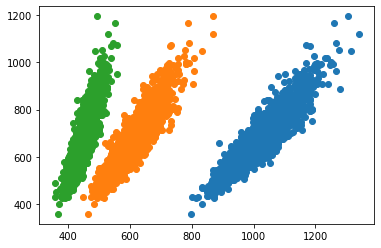

In [ ]:
x = newdf[['Heightin','buttockcircumference','thighcircumference','bideltoidbreadth','bicepscircumferenceflexed','buttockdepth','verticaltrunkcircumferenceusa','waistcircumference','thighclearance','hipbreadthsitting']]
y = newdf['weightkg']

plt.scatter(x.iloc[:,1],y)
plt.scatter(x.iloc[:,2],y)
plt.scatter(x.iloc[:,3],y)




In [ ]:
x.describe()

,Heightin,buttockcircumference,thighcircumference,bideltoidbreadth,bicepscircumferenceflexed,buttockdepth,verticaltrunkcircumferenceusa,waistcircumference,thighclearance,hipbreadthsitting
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000
mean,64.601712,1021.247734,616.148540,450.324270,305.578550,232.926989,1559.409366,860.905337,167.86002,398.961732
std,2.801938,75.894711,55.810299,28.687416,30.757033,24.328445,75.985542,99.931771,14.05848,32.749112
min,56.000000,798.000000,448.000000,357.000000,216.000000,168.000000,1342.000000,611.000000,121.00000,307.000000
25%,63.000000,969.000000,579.000000,430.000000,285.000000,216.000000,1508.000000,790.000000,158.00000,377.000000
50%,64.000000,1018.500000,613.000000,450.000000,304.000000,231.000000,1555.000000,852.000000,167.00000,397.000000
75%,66.000000,1069.000000,651.000000,469.000000,324.000000,248.000000,1610.000000,925.000000,177.00000,419.000000
max,80.000000,1341.000000,870.000000,558.000000,435.000000,349.000000,1828.000000,1334.000000,239.00000,541.000000


In [ ]:
x.head(3)

,Heightin,buttockcircumference,thighcircumference,bideltoidbreadth,bicepscircumferenceflexed,buttockdepth,verticaltrunkcircumferenceusa,waistcircumference,thighclearance,hipbreadthsitting
0,61,1011,622,466,315,223,1488,850,174,388
1,64,893,524,430,272,186,1470,708,152,335
2,68,987,577,450,300,204,1542,727,164,399


Applying LR

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#x_train = x_train.values.reshape(-1,1)
#x_test = x_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize=False)
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

y_pred = reg.predict(x_test)
print("r2: ", r2_score(y_test,y_pred) )


slope: [6.44738143 0.19563511 0.17908292 0.61448945 0.65259635 0.27284116
 0.19583248 0.14804532 0.72836928 0.08344698]
intercept [-1177.08664315]
r2:  0.9633909064600561


### 2b. Here I am using normalization as my feature scalling. As normalization bounds the all the values between 0 to 1 or -1 to 1. 

In [ ]:
reg = LinearRegression(normalize=True)
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

y_pred = reg.predict(x_test)
print("r2: ", r2_score(y_test,y_pred) )


slope: [6.44738143 0.19563511 0.17908292 0.61448945 0.65259635 0.27284116
 0.19583248 0.14804532 0.72836928 0.08344698]
intercept [-1177.08664315]
r2:  0.9633909064600561


### 2e.After using the feature scalling the result improved around 1% to 2% and when I have used standrad scalling in the model the result of the model improved a little than the previous.  

In [ ]:
x_test

,Heightin,buttockcircumference,thighcircumference,bideltoidbreadth,bicepscircumferenceflexed,buttockdepth,verticaltrunkcircumferenceusa,waistcircumference,thighclearance,hipbreadthsitting
1664,62,981,588,434,298,220,1520,866,153,395
1631,68,1065,645,439,307,226,1540,848,159,448
1058,61,1070,641,465,278,245,1519,920,175,428
1522,63,1047,623,416,286,243,1527,739,164,396
1948,60,1049,627,453,321,259,1502,966,166,419
...,...,...,...,...,...,...,...,...,...,...
554,65,1040,627,465,304,216,1610,851,179,412
1475,66,977,592,457,338,230,1598,780,170,356
160,67,1139,697,474,324,236,1661,939,176,499
253,63,964,615,447,293,218,1580,850,176,354


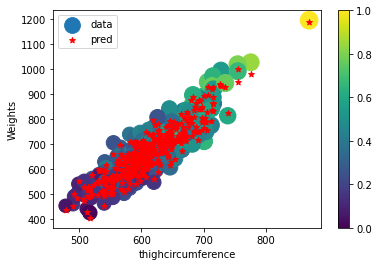

In [ ]:
plt.figure()

plt.scatter(x_test.iloc[:,2],y_test, c=x_test.iloc[:,4],s=x_test.iloc[:,5], label='data')
plt.scatter(x_test.iloc[:,2],y_pred, color='red', marker='*',label = 'pred')
plt.xlabel(x_test.columns[2])
plt.ylabel("Weights")
plt.legend()
plt.colorbar()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x) 
y1 = scaler.fit_transform(y.values.reshape(-1, 1))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)


In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

y_pred = reg.predict(x_test)
print("r2: ", r2_score(y_test,y_pred) )


slope: [0.16287602 0.12916039 0.08397764 0.15912    0.18241272 0.05423904
 0.14313645 0.13429917 0.10721328 0.0282138 ]
intercept [0.00060523]
r2:  0.9637358730074621


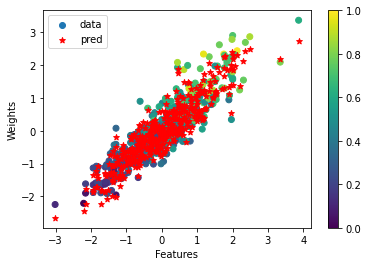

In [ ]:
plt.figure()

plt.scatter(x_test[:,2],y_test, c=x_test[:,4], label='data')
plt.scatter(x_test[:,2],y_pred, color='red', marker='*',label = 'pred')
plt.xlabel("Features")
plt.ylabel("Weights")
plt.legend()
plt.colorbar()
plt.show()

# After using scaler transform of the dataset the model improved all the way. This scatter plot is also with scalling.

```
# This is formatted as code
```

